In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import json
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['TeX Gyre Heros']
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'TeX Gyre Heros'
mpl.rcParams['mathtext.it'] = 'TeX Gyre Heros:italic'
mpl.rcParams['mathtext.bf'] = 'TeX Gyre Heros:bold'
from matplotlib import rc

# Set global font size for LaTeX rendering using rc
rc('text', usetex=True)  # Use LaTeX for text rendering
rc('font', size=14)      # Global font size
rc('axes', titlesize=18, labelsize=16)  # Title and label font size
rc('xtick', labelsize=14)  # X-tick label font size
rc('ytick', labelsize=14)  # Y-tick label font size

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "TeX Gyre Heros",
    "text.latex.preamble": r"\usepackage{tgheros} \usepackage{sansmath} \sansmath"
})

In [2]:
def add_proc_score_num_events(num_events,region_name,proc_name,score_0_events,score_1_events,color_dict):
       if not(region_name in num_events.keys()): num_events[region_name] = {}
       num_events[region_name][proc_name] = dict.fromkeys(['score_0','score_1'])
       num_events[region_name][proc_name]['score_0'] = {}; num_events[region_name][proc_name]['score_1'] = {}
       num_events[region_name][proc_name]['score_0']['num_events']=score_0_events;num_events[region_name][proc_name]['score_0']['color']=color_dict[proc_name]['score_0']
       num_events[region_name][proc_name]['score_1']['num_events']=score_1_events;num_events[region_name][proc_name]['score_1']['color']=color_dict[proc_name]['score_1']

def sum_pre_post_vfp(yields_dict, year='2016'):
        combined = {}
        for region in ["SingleEleCR", "SingleMuCR", "DoubleMuCR", "DoubleEleCR"]:
                combined[region] = {
                        "data": {"score_0": 0.0, "score_1": 0.0},
                        "sum_bkg_mc": {"score_0": 0.0, "score_1": 0.0}
                }
                for time_period in ["pre_VFP", "post_VFP"]:
                        region_data = yields_dict[year][time_period].get(region, {})

                        for proc in ["data", "sum_bkg_mc"]:
                                if proc in region_data:
                                        combined[region][proc]["score_0"] += region_data[proc].get("score_0", 0.0)
                                        combined[region][proc]["score_1"] += region_data[proc].get("score_1", 0.0)
        return combined


colors = {
        '2016_combined':{
                'sum_bkg_mc':{'score_0':mcolors.CSS4_COLORS['powderblue'],'score_1':mcolors.CSS4_COLORS['royalblue']},#skyblue,azure
                'data':{'score_0':mcolors.CSS4_COLORS['lightgrey'],'score_1':mcolors.CSS4_COLORS['dimgrey']},
        },
        '2017':{
                'sum_bkg_mc':{'score_0':mcolors.CSS4_COLORS['seashell'],'score_1':mcolors.CSS4_COLORS['firebrick']},#lightcoral,mistyrose
                'data':{'score_0':mcolors.CSS4_COLORS['lightgrey'],'score_1':mcolors.CSS4_COLORS['dimgrey']},
        },
        '2018':{
                'sum_bkg_mc':{'score_0':mcolors.CSS4_COLORS['palegreen'],'score_1':mcolors.CSS4_COLORS['forestgreen']},#lightgreen,honeydew
                'data':{'score_0':mcolors.CSS4_COLORS['lightgrey'],'score_1':mcolors.CSS4_COLORS['dimgrey']},
        },
}


In [3]:
num_events = OrderedDict()
threshold = '0.71'
rebin =1
yields_file_name = 'yields_all_years_all_regions_threshold_%s_rebin_%s.json'%(threshold,rebin)
with open(yields_file_name, 'r') as f:
    yields_dict = json.load(f)
regions_to_get = ['SingleMuCR','SingleEleCR','DoubleMuCR','DoubleEleCR']
eras = ['2016_combined','2017','2018']
yields_dict['2016_combined'] = sum_pre_post_vfp(yields_dict)
print(yields_dict['2016_combined'])

for region in regions_to_get:
        for era in eras:
                tag = ('%s_%s'%(region,era)).replace('_combined','')
                for proc in ["sum_bkg_mc","data"]:
                        yield_dict_entry = yields_dict[era][region][proc]     
                        add_proc_score_num_events(num_events,tag,proc,yield_dict_entry['score_0'],yield_dict_entry['score_1'],colors[era])  

{'SingleEleCR': {'data': {'score_0': 455.0, 'score_1': 26.0}, 'sum_bkg_mc': {'score_0': 555.3073903216773, 'score_1': 43.050735035004074}}, 'SingleMuCR': {'data': {'score_0': 648.0, 'score_1': 29.0}, 'sum_bkg_mc': {'score_0': 808.7855118312152, 'score_1': 51.481122287834104}}, 'DoubleMuCR': {'data': {'score_0': 41.0, 'score_1': 3.0}, 'sum_bkg_mc': {'score_0': 62.118857712919485, 'score_1': 2.870736458880014}}, 'DoubleEleCR': {'data': {'score_0': 42.0, 'score_1': 1.0}, 'sum_bkg_mc': {'score_0': 54.562962790840274, 'score_1': 3.54563449262299}}}


In [4]:
bkg_mc_sum_values_score_0  = []
bkg_mc_sum_values_score_1 = []
data_values_score_0 = []
data_values_score_1 = []

for tag_name in num_events.keys():#Regions
        for proc in num_events[tag_name].keys():#['sum_bkg_mc','data']
                score_0 = num_events[tag_name][proc]['score_0']['num_events']
                score_1 = num_events[tag_name][proc]['score_1']['num_events']
                #total = score_0 + score_1
                #num_events[region_name][proc]['total'] = total 
                print("%s: proc %s: score_0=%s,score_1=%s"%(tag_name,proc,score_0,score_1))
                #print("%s: proc %s: total events=%s"%(region_name,proc,total))
                if(proc=='sum_bkg_mc'): 
                        bkg_mc_sum_values_score_0.append(score_0)
                        bkg_mc_sum_values_score_1.append(score_1)
                elif(proc=='data'): 
                        data_values_score_0.append(score_0)
                        data_values_score_1.append(score_1)
                #input("ok?")                      

bkg_mc_sum_values_score_0  = np.array(bkg_mc_sum_values_score_0)
bkg_mc_sum_values_score_1 = np.array(bkg_mc_sum_values_score_1)
data_values_score_0 = np.array(data_values_score_0)
data_values_score_1 = np.array(data_values_score_1)

bkg_mc_sum_total = bkg_mc_sum_values_score_0 + bkg_mc_sum_values_score_1
data_total = data_values_score_0 + data_values_score_1
print(bkg_mc_sum_total)
print(data_total)

bkg_mc_sum_score_0_percent = np.round_((bkg_mc_sum_values_score_0/bkg_mc_sum_total)*100,2)#Since CR, all values getting sccore 1 are error
data_score_0_percent = np.round_((data_values_score_0/data_total)*100,2)
bkg_mc_sum_score_1_percent = np.round_((bkg_mc_sum_values_score_1/bkg_mc_sum_total)*100,2)#Since CR, all values getting sccore 1 are error
data_score_1_percent = np.round_((data_values_score_1/data_total)*100,2)
print(bkg_mc_sum_score_1_percent)
print(data_score_1_percent)
total_percent_bkg = bkg_mc_sum_score_0_percent + bkg_mc_sum_score_1_percent# should be 100 if everything done correctly
total_percent_data = data_score_0_percent + data_score_1_percent# should be 100 if everything done correctly
#print(total_percent_bkg)
#print(total_percent_data)

bar_colors_bkg_mc_score_0 = [
        colors['2016_combined']['sum_bkg_mc']['score_0'],colors['2017']['sum_bkg_mc']['score_0'],colors['2018']['sum_bkg_mc']['score_0'],# SingleMuCR
        colors['2016_combined']['sum_bkg_mc']['score_0'],colors['2017']['sum_bkg_mc']['score_0'],colors['2018']['sum_bkg_mc']['score_0'],# SingleEleCR
        colors['2016_combined']['sum_bkg_mc']['score_0'],colors['2017']['sum_bkg_mc']['score_0'],colors['2018']['sum_bkg_mc']['score_0'],# DoubleMuCR
        colors['2016_combined']['sum_bkg_mc']['score_0'],colors['2017']['sum_bkg_mc']['score_0'],colors['2018']['sum_bkg_mc']['score_0'],# DoubleEleCR
        ]

bar_colors_bkg_mc_score_1 = [
        colors['2016_combined']['sum_bkg_mc']['score_1'],colors['2017']['sum_bkg_mc']['score_1'],colors['2018']['sum_bkg_mc']['score_1'],# SingleMuCR
        colors['2016_combined']['sum_bkg_mc']['score_1'],colors['2017']['sum_bkg_mc']['score_1'],colors['2018']['sum_bkg_mc']['score_1'],# SingleEleCR
        colors['2016_combined']['sum_bkg_mc']['score_1'],colors['2017']['sum_bkg_mc']['score_1'],colors['2018']['sum_bkg_mc']['score_1'],# DoubleMuCR
        colors['2016_combined']['sum_bkg_mc']['score_1'],colors['2017']['sum_bkg_mc']['score_1'],colors['2018']['sum_bkg_mc']['score_1'],# DoubleEleCR
        ]



SingleMuCR_2016: proc sum_bkg_mc: score_0=808.7855118312152,score_1=51.481122287834104
SingleMuCR_2016: proc data: score_0=648.0,score_1=29.0
SingleMuCR_2017: proc sum_bkg_mc: score_0=994.3772493067419,score_1=51.900600131557425
SingleMuCR_2017: proc data: score_0=782.0,score_1=28.0
SingleMuCR_2018: proc sum_bkg_mc: score_0=1312.9570729696616,score_1=103.92772887170126
SingleMuCR_2018: proc data: score_0=1133.0,score_1=45.0
SingleEleCR_2016: proc sum_bkg_mc: score_0=555.3073903216773,score_1=43.050735035004074
SingleEleCR_2016: proc data: score_0=455.0,score_1=26.0
SingleEleCR_2017: proc sum_bkg_mc: score_0=578.3514271735978,score_1=39.52425756577118
SingleEleCR_2017: proc data: score_0=585.0,score_1=24.0
SingleEleCR_2018: proc sum_bkg_mc: score_0=883.2886507133912,score_1=55.53021608713947
SingleEleCR_2018: proc data: score_0=788.0,score_1=37.0
DoubleMuCR_2016: proc sum_bkg_mc: score_0=62.118857712919485,score_1=2.870736458880014
DoubleMuCR_2016: proc data: score_0=41.0,score_1=3.0
Do

In [7]:
def heading(text):
    return mpatches.Patch(color='none', label=f'\\textbf{{{text}}}')#f'$\mathbf{{{text}}}$'

def get_percent_plot():
        test_fig =plt.figure(figsize=(15,10))
        test_fig.clear()
        ax = plt.subplot()
        # use total here instead of just score 1 because this will be plotted first
        # will be covered by the score0, the remaining visible will be score 1
        X_axis = np.arange(len(num_events.keys()))
        print(X_axis)
        Y_axis = np.arange(0,150,10)
        ax.bar(X_axis - 0.2, total_percent_bkg, 0.4, label = '_nolegend_',color=bar_colors_bkg_mc_score_1)
        ax.bar(X_axis + 0.2, total_percent_data, 0.4, label = '_nolegend_',color=colors['2017']['data']['score_1'])
        ax.bar(X_axis - 0.2, bkg_mc_sum_score_0_percent, 0.4, label = '_nolegend_',color=bar_colors_bkg_mc_score_0)
        ax.bar(X_axis + 0.2, data_score_0_percent, 0.4, label = '_nolegend_',color=colors['2017']['data']['score_0'])
        #ax.plot([-0.4, 11.4], [95, 95], linestyle = '--', lw = 2, color = 'red', label = '95\% ') # addinga. twin on right instead of this

        # Manually create legend handles
        #legend_handles = [
        #    mpatches.Patch(color=colors['2016_combined']['sum_bkg_mc']['score_0'], label='2016 Background-like MC'),
        #    mpatches.Patch(color=colors['2017']['sum_bkg_mc']['score_0'], label='2017 Background-like MC'),
        #    mpatches.Patch(color=colors['2018']['sum_bkg_mc']['score_0'], label='2018 Background-like MC'),
        #    mpatches.Patch(color=colors['2016_combined']['sum_bkg_mc']['score_1'], label='2016 Signal-like MC'),
        #    mpatches.Patch(color=colors['2017']['sum_bkg_mc']['score_1'], label='2017 Signal-like MC'),
        #    mpatches.Patch(color=colors['2018']['sum_bkg_mc']['score_1'], label='2018 Signal-like MC'),
        #    mpatches.Patch(color=colors['2017']['data']['score_0'], label='Background-like Data'),
        #    mpatches.Patch(color=colors['2017']['data']['score_1'], label='Signal-like Data'),   
        #]
        #ax.legend(handles=legend_handles, loc="upper right")
        legend_handles = [
            # Column 1: Background-like MC
            heading(r'\mathrm{Background-like\ MC}'),#'Background-like~MC'
            mpatches.Patch(color=colors['2016_combined']['sum_bkg_mc']['score_0'], label='2016'),
            mpatches.Patch(color=colors['2017']['sum_bkg_mc']['score_0'], label='2017'),
            mpatches.Patch(color=colors['2018']['sum_bkg_mc']['score_0'], label='2018'),
        
            # Column 2: Signal-like MC
            heading('Signal-like~MC'),
            mpatches.Patch(color=colors['2016_combined']['sum_bkg_mc']['score_1'], label='2016'),
            mpatches.Patch(color=colors['2017']['sum_bkg_mc']['score_1'], label='2017'),
            mpatches.Patch(color=colors['2018']['sum_bkg_mc']['score_1'], label='2018'),
        
            # Column 3: Data
            heading('Data'),
            mpatches.Patch(color=colors['2017']['data']['score_0'], label='Background-like'),
            mpatches.Patch(color=colors['2017']['data']['score_1'], label='Signal-like'),
        ]
        ax.legend(handles=legend_handles, ncol=3, loc='upper right', frameon=False)
        x_labels = [x.split('_')[-1] for x in num_events.keys()]
        ax.set_xticks(X_axis)#, num_events.keys())
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        # Add large (group) labels across every 3 sets
        group_size = 3
        n_groups = len(X_axis) // group_size
        group_labels = ['single muon', 'single electron', 'double muon', 'double electron']  # adjust as needed

        for i, label in enumerate(group_labels):
                start = i * group_size
                end = start + group_size
                center = X_axis[start:end].mean()
                ax.text(center, -0.10, label, ha='center', va='top', fontsize=24, transform=ax.get_xaxis_transform())
        ax.set_yticks(Y_axis)
        ax.xaxis.set_label_coords(0.5, -0.18)
        ax.set_xlabel("Control Sample Type",fontsize=24)
        ax.set_ylabel("Event Yield (normalized)")#("Percentage of events out of total events passing corresponding selections")
        # Left-aligned CMS
        ax.text(0.01, 1.035, r"\textbf{CMS}", color='black', transform=ax.transAxes, fontsize=18,verticalalignment='top', horizontalalignment='left')

        
        # Right-aligned lumi/energy
        test_fig.suptitle(
            r"$36.3~\mathrm{fb^{-1}} (2016),41.5~\mathrm{fb^{-1}} (2017),59.7~\mathrm{fb^{-1}} (2018)$ (13 TeV)",
            fontsize=18,
            x=0.95,    # far right
            y=0.93,    # same as above for alignment
            ha='right'
        )
        
        # Middle title: split into two lines, smaller font
        #ax.set_title(
        #    "Signal-like and Background-like percentages \n of Control Samples",
        #    fontsize=18,  # or your preferred smaller size
        #    pad=10,  # adjust vertical spacing as needed
        #    x=0.22,
        #    y=0.90
        #)
        #ax.set_title(r"$\mathbf{CMS}$  $36.3,41.5,59.7~\mathrm{fb^{-1}}$(13 TeV)")
        #ax.set_title("Signal-like and Background-like percentage for data \& MC in 2016, 2017, 2018 Control Samples (threshold=%s)"%threshold)
        #ax.legend(loc="upper right")
        plt.yticks(np.arange(0, 101, 10))
        ax2 = ax.twinx()
        # Link the y-axis limits of the twin axes to the primary axes
        # This ensures they have the same scale and range
        ax2.set_ylim(ax.get_ylim())
        ax2.set_yticks(np.arange(0, 101, 10))
        plt.tight_layout()
        plt.show()    
        test_fig.savefig("error_percent_CRs_all_eras_threshold%s_rebin%s_color.pdf"%(threshold,rebin))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


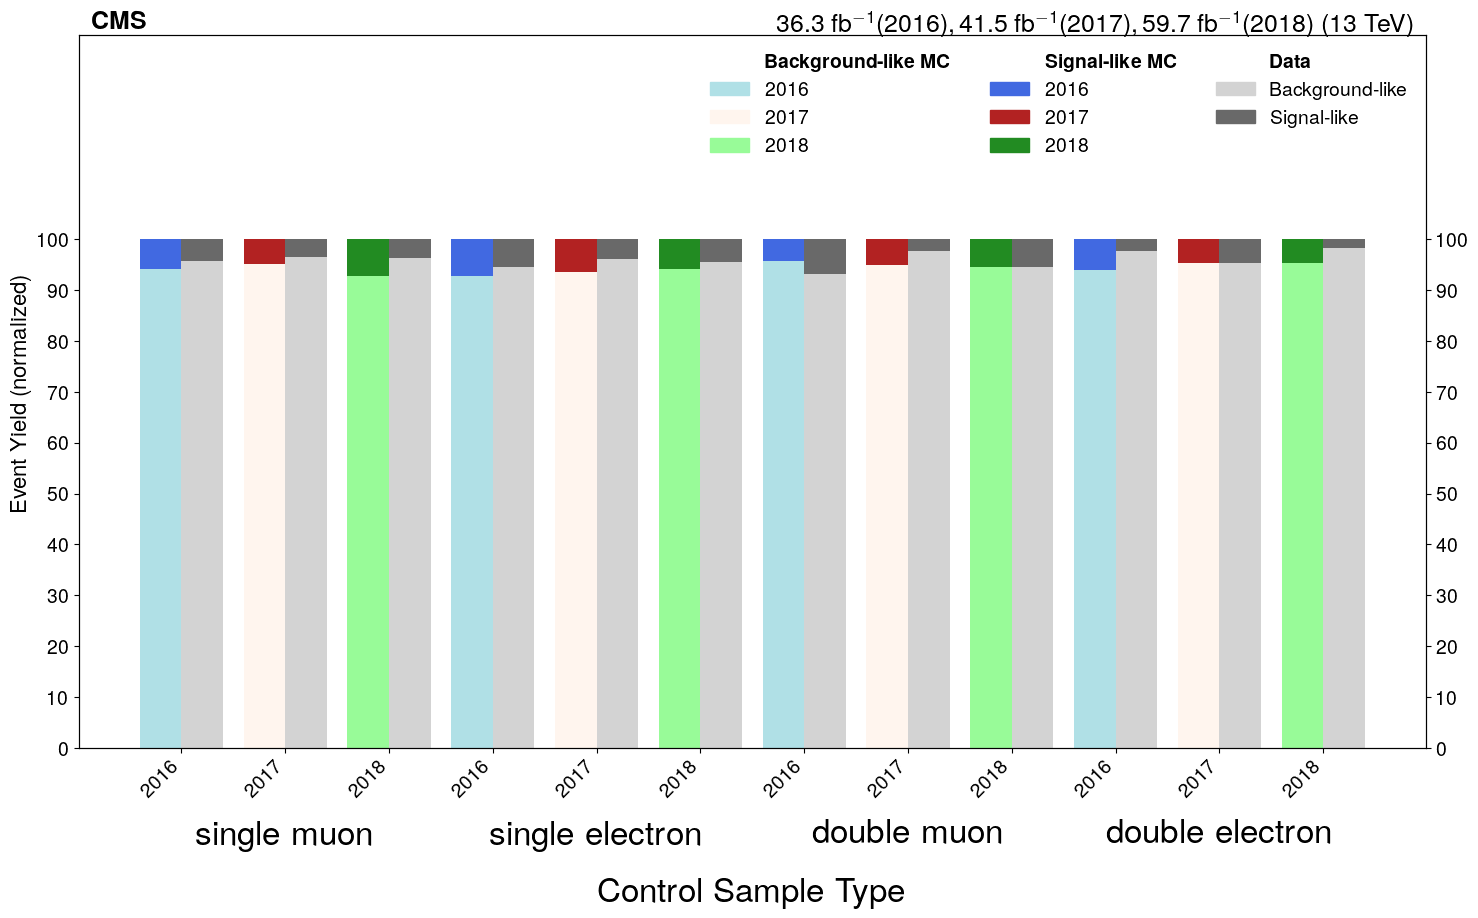

In [8]:
get_percent_plot()